In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

    
with open('language_editors.pkl', 'rb') as x:
    language_activities = pickle.load(x)

print("El diccionario language_editors ha sido cargado correctamente.")

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'games': 3,
    'geography': 4,
    'health': 5,
    'history': 6,
    'mathematics': 7,
    'nature': 8,
    'philosophy': 9,
    'politics': 10,
    'religion': 11,
    'rights': 12,
    'sports': 13
}


data_list = []
for language, categories_data in language_activities.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_pivot)




El diccionario language_editors ha sido cargado correctamente.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Turn the dataframe into a numpy object
df = data_pivot.values

In [25]:
from sklearn.preprocessing import StandardScaler
# Supongamos que df es tu DataFrame o array de numpy
data = df  # Si df ya es un numpy array, no necesitas convertirlo

# Normalización de los datos usando StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [26]:
data

array([[-0.91551935, -0.69820862, -0.92686597, ..., -0.89710516,
        -0.58652948, -0.92882973],
       [ 1.21726192, -0.15586948, -0.23043538, ...,  1.42039317,
         0.25010231,  0.88463923],
       [ 2.08416962,  2.30974172,  1.35517162, ...,  1.91075167,
         3.03072205,  2.15192138],
       ...,
       [-0.58399668, -0.47244302, -0.12315234, ..., -0.51701572,
        -0.40236978, -0.61013134],
       [-1.0460263 , -0.78700976, -1.14143206, ..., -1.1835583 ,
        -0.64959459, -1.06779081],
       [-0.53932652, -0.60589558, -0.73048346, ..., -0.71476079,
        -0.47142967, -0.75982301]])

In [27]:
df.shape

(11, 2184)

In [28]:
n_input_layer = df.shape[1]
n_hidden1 = 30
n_hidden2 = 15
n_hidden3 = 15

n_encoding_layer = 10

n_hidden5 = 15
n_hidden6 = 15
n_hidden7 = 30
n_output_layer = n_input_layer  # of course, the output layer must be of the same size of the input layer
     

In [29]:

# Placeholders are kind of "empty variables" in a TF computational graph.
# I will feed the actual data through them - in the graph, they are like entry doors for my data

#X = tf.placeholder(tf.float32, shape = [None, df.shape[1]], name='X')
X = tf.keras.layers.Input(shape=(df.shape[1],), name='X')

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
# Definición de la arquitectura del autoencoder
input_layer = Input(shape=(n_input_layer,), name="input_layer")
hidden1 = Dense(n_hidden1, activation=tf.nn.leaky_relu, name="hidden_layer1")(input_layer)
hidden2 = Dense(n_hidden2, activation=tf.nn.leaky_relu, name="hidden_layer2")(hidden1)
hidden3 = Dense(n_hidden3, activation=tf.nn.leaky_relu, name="hidden_layer3")(hidden2)
encoding_layer = Dense(n_encoding_layer, activation=tf.nn.leaky_relu, name="encoding_layer")(hidden3)
hidden5 = Dense(n_hidden5, activation=tf.nn.leaky_relu, name="hidden_layer5")(encoding_layer)
hidden6 = Dense(n_hidden6, activation=tf.nn.leaky_relu, name="hidden_layer6")(hidden5)
hidden7 = Dense(n_hidden7, activation=tf.nn.leaky_relu, name="hidden_layer7")(hidden6)
output_layer = Dense(n_output_layer, activation=tf.nn.leaky_relu, name="output_layer")(hidden7)

In [31]:
# set number of epochs
n_epochs = 5000

# set learning rate
learning_rate = 0.001

In [32]:
# implement Mean Squared Error
loss = tf.reduce_mean(tf.square(X - output_layer))

In [33]:
from tensorflow.keras.models import Model
# Define the TensorFlow operation that trains the model
#training_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)
# Construcción del modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Definir el optimizador y compilar el modelo
autoencoder.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [34]:
# Guardar solo los pesos del modelo
autoencoder.save_weights('Encoder.h5')

In [35]:
print(autoencoder.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2184)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                65550     
                                                                 
 hidden_layer2 (Dense)       (None, 15)                465       
                                                                 
 hidden_layer3 (Dense)       (None, 15)                240       
                                                                 
 encoding_layer (Dense)      (None, 10)                160       
                                                                 
 hidden_layer5 (Dense)       (None, 15)                165       
                                                                 
 hidden_layer6 (Dense)       (None, 15)                240 

In [36]:
data

array([[-0.91551935, -0.69820862, -0.92686597, ..., -0.89710516,
        -0.58652948, -0.92882973],
       [ 1.21726192, -0.15586948, -0.23043538, ...,  1.42039317,
         0.25010231,  0.88463923],
       [ 2.08416962,  2.30974172,  1.35517162, ...,  1.91075167,
         3.03072205,  2.15192138],
       ...,
       [-0.58399668, -0.47244302, -0.12315234, ..., -0.51701572,
        -0.40236978, -0.61013134],
       [-1.0460263 , -0.78700976, -1.14143206, ..., -1.1835583 ,
        -0.64959459, -1.06779081],
       [-0.53932652, -0.60589558, -0.73048346, ..., -0.71476079,
        -0.47142967, -0.75982301]])

In [37]:
from tensorflow.keras.callbacks import Callback
# Callback para monitorear la pérdida
class LossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        # if epoch % 100 == 0:
        #     print(f"{epoch+1}. Loss: {logs.get('loss')},")

loss_history = LossHistory()

# Entrenamiento del modelo con el callback
history=autoencoder.fit(data, data, epochs=n_epochs, batch_size=256, shuffle=True, callbacks=[loss_history])

# Guardar el modelo completo
autoencoder.save('autoencoder_model_standarizadaeditors.h5')

# Extracción de la parte del encoder para la reducción de dimensionalidad
encoder = Model(inputs=input_layer, outputs=encoding_layer)

# Transformación de los datos
encoded_data = encoder.predict(data)


print("Encoding complete.")

Epoch 1/5000
1/1 [==============================] - 0s 189ms/step - loss: 0.9910
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.9468
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8944
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.8373
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7931
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7726
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7541
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7183
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6769
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6414
Epoch 11/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6157
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5956
Epoch 13/5000
1/1 [============================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 4ms/step - loss: 4.9356e-06
Epoch 3352/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.4888e-06
Epoch 3353/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.8860e-06
Epoch 3354/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2704e-05
Epoch 3355/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8580e-05
Epoch 3356/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8053e-05
Epoch 3357/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2544e-05
Epoch 3358/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6203e-05
Epoch 3359/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0158e-04
Epoch 3360/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6456e-04
Epoch 3361/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5466e-04
Epoch 3362/5000
1/1 [==============================] - 0s 2ms/step - l

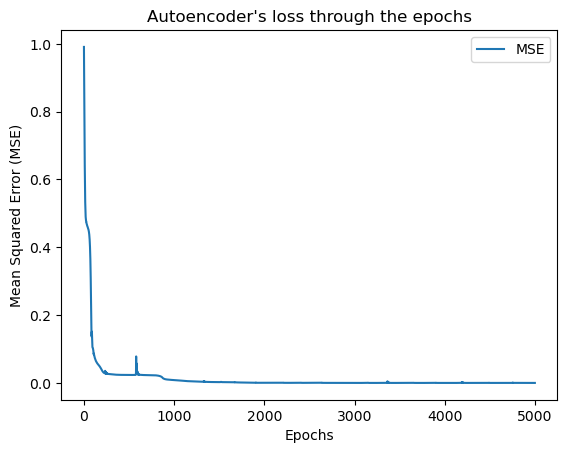

In [38]:
# Graficar la pérdida a lo largo de las épocas
plt.plot(loss_history.losses, label="MSE")
plt.title("Autoencoder's loss through the epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

In [39]:
# You can save it in a pandas dataframe
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Let's take a look:
encoded_pandas_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,17.825525,15.217740,9.775885,18.240437,1.143457,13.102988,23.701111,5.517799,15.538903,6.796379
std,15.340236,31.751390,17.247030,16.115892,9.209938,14.261024,27.832941,10.367617,21.026939,9.608628
min,-3.252361,-4.187639,-6.985786,-2.335402,-4.367652,-4.694585,-14.128359,-2.890295,-3.862407,-3.126888
25%,6.487884,-3.333783,-4.769227,2.165592,-3.867897,-0.492032,-1.996770,-1.737316,0.941516,-1.673746
50%,12.355583,-1.421320,1.336508,22.115772,-2.751183,14.834802,22.339336,-0.476183,3.325878,5.538441
75%,30.330350,14.085481,23.584048,29.533642,-0.043587,22.445288,48.575403,12.184039,28.616323,13.705994
max,44.309208,93.973328,37.232765,43.321632,23.620453,38.232784,63.773022,24.953018,55.150909,25.081041


In [40]:
encoded_pandas_dataframe

,0,1,2,3,4,5,6,7,8,9
0,33.815693,-3.735932,27.854116,25.843920,-3.407738,14.834802,57.579170,-1.602753,8.281034,5.538441
1,8.260124,10.294480,-5.794158,34.610809,23.620453,27.405022,-1.155223,-2.890295,47.056976,-3.126888
2,35.446850,93.973328,-6.235981,43.321632,-2.550846,38.232784,-14.128359,24.953018,55.150909,-2.577755
3,2.677709,17.876482,-3.744296,0.683039,2.069515,17.485554,-2.838317,11.559511,34.758335,-1.397204
4,12.355583,-3.552765,37.232765,15.597185,-4.357259,-0.151172,50.039261,-1.871880,1.580561,15.967903
5,-3.252361,5.564125,1.336508,-1.907570,-3.929793,-4.694585,22.339336,0.061590,-3.862407,25.081041
6,19.060890,-1.598286,-6.985786,-2.335402,14.215224,17.482569,12.121542,21.647652,3.081764,-1.035565
7,11.846432,57.297482,-2.894892,26.816242,-3.806001,-0.832892,-4.820131,12.808566,0.302470,10.848483
8,4.715643,-1.421320,13.253139,3.648144,-2.751183,-1.081226,30.690351,-0.476183,-1.221891,13.696907
9,26.845007,-4.187639,34.199326,22.115772,-4.367652,7.101633,63.773022,-1.563275,3.325878,13.715081


In [41]:
import pandas as pd

# Supongamos que encoded_pandas_dataframe es tu DataFrame actual
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Lista de nuevos índices de fila
new_index = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Asegúrate de que el tamaño del índice coincida con el número de filas en el DataFrame
if len(new_index) == encoded_pandas_dataframe.shape[0]:
    encoded_pandas_dataframe.index = new_index
else:
    raise ValueError("El tamaño del índice nuevo no coincide con el número de filas en el DataFrame")

# Mostrar el DataFrame con los nuevos índices
print(encoded_pandas_dataframe)

            0          1          2          3          4          5  \
ar  33.815693  -3.735932  27.854116  25.843920  -3.407738  14.834802   
de   8.260124  10.294480  -5.794158  34.610809  23.620453  27.405022   
es  35.446850  93.973328  -6.235981  43.321632  -2.550846  38.232784   
fr   2.677709  17.876482  -3.744296   0.683039   2.069515  17.485554   
hu  12.355583  -3.552765  37.232765  15.597185  -4.357259  -0.151172   
it  -3.252361   5.564125   1.336508  -1.907570  -3.929793  -4.694585   
ja  19.060890  -1.598286  -6.985786  -2.335402  14.215224  17.482569   
pt  11.846432  57.297482  -2.894892  26.816242  -3.806001  -0.832892   
ru   4.715643  -1.421320  13.253139   3.648144  -2.751183  -1.081226   
vi  26.845007  -4.187639  34.199326  22.115772  -4.367652   7.101633   
zh  44.309208  -3.114801  19.313980  32.251041  -2.156689  28.350395   

            6          7          8          9  
ar  57.579170  -1.602753   8.281034   5.538441  
de  -1.155223  -2.890295  47.056976  

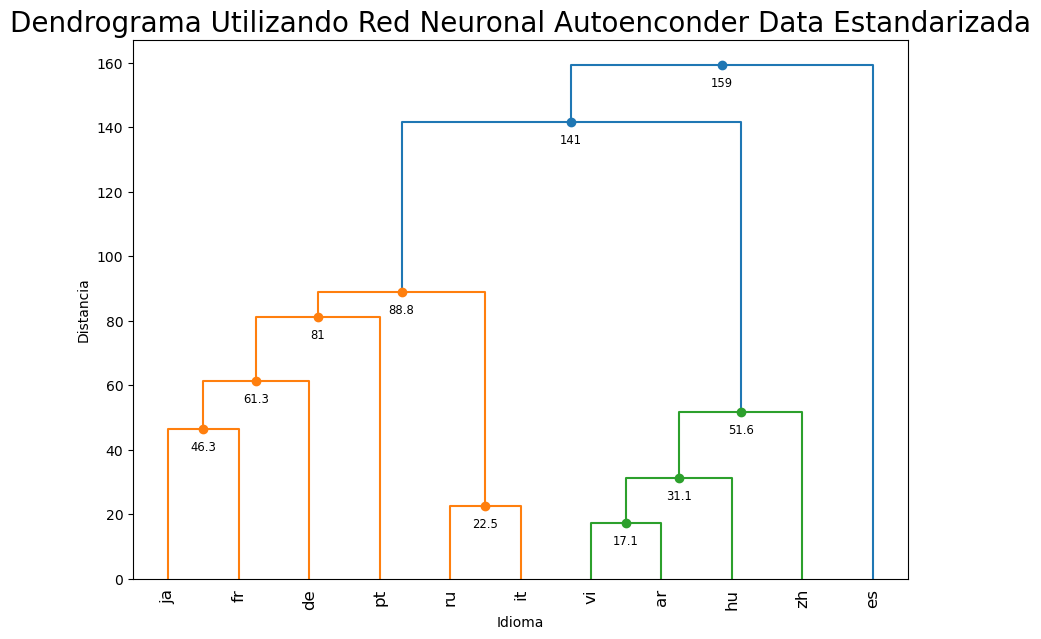

In [42]:
# Realizar la clusterización jerárquica
linked = linkage(encoded_pandas_dataframe, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = encoded_pandas_dataframe.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma Utilizando Red Neuronal Autoenconder Data Estandarizada',fontsize=20)
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('editores/dendrogram7AutoEncoderEstandarizada.png')
plt.show()